<a href="https://colab.research.google.com/github/oceanboy-3141/Platformer-game-1/blob/main/Self_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing, installing, & getting stuff ready

In [ ]:
# prompt: pip instal tiktoken
!pip install matplotlib seaborn
!pip install tiktoken
import matplotlib.pyplot as plt
import seaborn as sns
import tiktoken

In [ ]:
gdoc_file_name = 'DOC of tokens for testing.gdoc'
just_file_name = 'DOC of tokens for testing'

from google.colab import drive
import os

# Ensure drive is mounted
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted")

# Define the file path in Google Drive (this is the path you see with ls)
file_path_gdrive = '/content/drive/My Drive/' + gdoc_file_name
# Define a temporary path to save the downloaded file
temp_file_path = '/tmp/tester_text_content.txt'

# Use Google Drive API to download the file as plain text
# This requires installing the google-api-python-client
!pip install google-api-python-client

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import io

drive_service = build('drive', 'v3')

# Search for the file by name and mime type
# Note: We use mimeType to specifically target Google Docs files
results = drive_service.files().list(
    q=f"name='{just_file_name}' and mimeType='application/vnd.google-apps.document'",
    fields="files(id, name)").execute()
items = results.get('files', [])

if not items:
    print('No files found with the specified name and type.')
else:
    # Assuming the first result is the correct file.
    # If you have multiple files with the same name, you might need to
    # add more criteria to the search query.
    file_id = items[0]['id']

    # Download the file as plain text using export_media
    request = drive_service.files().export_media(fileId=file_id,
                                                 mimeType='text/plain')
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    # Use next_chunk() and check the done attribute of the downloader
    while not done:
        status, done = downloader.next_chunk()
        print(f"Download {int(status.progress() * 100)}%.")

    # Write the downloaded content to a temporary file
    fh.seek(0)
    with open(temp_file_path, 'wb') as f:
        f.write(fh.read())

    # Read the content from the temporary file using standard open()
    with open(temp_file_path, 'r') as f:
        file_contents = f.read()

    print("\nFile content:")
    print(file_contents)

    # Clean up the temporary file
    os.remove(temp_file_path)

# If no file was found or processed, file_contents might not be defined.
# You might want to add a check here depending on how you intend to use
# file_contents later.
if 'file_contents' in locals():
    # Now you can use file_contents which contains the text from your Google Doc
    pass
else:
    print("\nFile content could not be retrieved.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Download 100%.

File content:
﻿the a an I you he she it we they my your his her its our their of to in for with on at by from and but or so because be is am are was were have do say get make go know take see come think good well new just out up down over under not very really How are you Nice to meet you Thank you I appreciate your help Please let me know See you later What do you think That sounds great Excuse me I'm sorry to hear that I don't know Of course **time person year way day thing man world life hand part child eye woman place work week case point government company number group problem fact be have do say get make go know take see come think look want give use find tell ask work seem feel try leave call good new first last long great little own other old right big high different small large next early young important few public bad same able about

# Mapping DOC of tokens for testing

In [ ]:
# prompt: for the file DOC of tokens for testing please tell me how many tokens there are (using tiktoken) and what there token ID is and please make sure you use a histogram

# Import tiktoken here to ensure it's available in this cell
import tiktoken
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the encoder
# Using the 'o200k_base' encoding which is suitable for many GPT models
encoding = tiktoken.get_encoding("o200k_base")

# Check if file_contents variable exists and is not empty
# Assuming file_contents is defined in a previous cell execution
if 'file_contents' in locals() and file_contents:
    # Encode the text to get token IDs
    token_ids = encoding.encode(file_contents)

    # Calculate the number of tokens
    num_tokens = len(token_ids)

    print(f"\nNumber of tokens in the document: {num_tokens}")
    print(f"Token IDs: {token_ids}")

    # Create a histogram of token IDs
    plt.figure(figsize=(10, 6))
    # Ensure bins are appropriate for the data range
    if token_ids: # Check if token_ids is not empty to avoid errors with min/max
        bins = max(token_ids) - min(token_ids) + 1
        # Limit the number of bins for very large ranges to avoid memory issues and unreadable plots
        if bins > 1000:
             bins = 1000 # Or some other reasonable number
        sns.histplot(token_ids, bins=bins, kde=False)
        plt.title('Distribution of Token IDs')
        plt.xlabel('Token ID')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print("No token IDs to plot histogram.")
else:
    print("\nCould not retrieve file content or file content is empty. Cannot perform token analysis.")


Could not retrieve file content or file content is empty. Cannot perform token analysis.


In [ ]:
gdoc_file_name = 'DOC of tokens for testing.gdoc'
just_file_name = 'DOC of tokens for testing'

from google.colab import drive
import os

# Ensure drive is mounted
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted")

# Define the file path in Google Drive (this is the path you see with ls)
file_path_gdrive = '/content/drive/My Drive/' + gdoc_file_name
# Define a temporary path to save the downloaded file
temp_file_path = '/tmp/tester_text_content.txt'

# Use Google Drive API to download the file as plain text
# This requires installing the google-api-python-client
!pip install google-api-python-client

from google.colab import auth
auth.authenticate_user()

from googleapiclient.discovery import build
from googleapiclient.http import MediaIoBaseDownload
import io

drive_service = build('drive', 'v3')

# Search for the file by name and mime type
# Note: We use mimeType to specifically target Google Docs files
print(f"Searching for file: '{just_file_name}' with mimeType 'application/vnd.google-apps.document'")
results = drive_service.files().list(
    q=f"name='{just_file_name}' and mimeType='application/vnd.google-apps.document'",
    fields="files(id, name)").execute()
items = results.get('files', [])

if not items:
    print('No files found with the specified name and type.')
    # Ensure file_contents is not defined or is empty in this case
    if 'file_contents' in locals():
        del file_contents
else:
    print(f"Found {len(items)} file(s) with the specified name and type.")
    # Assuming the first result is the correct file.
    # If you have multiple files with the same name, you might need to
    # add more criteria to the search query.
    file_id = items[0]['id']
    print(f"Processing file: {items[0]['name']} (ID: {file_id})")

    # Download the file as plain text using export_media
    request = drive_service.files().export_media(fileId=file_id,
                                                 mimeType='text/plain')
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fh, request)
    done = False
    # Use next_chunk() and check the done attribute of the downloader
    while not done:
        status, done = downloader.next_chunk()
        print(f"Download {int(status.progress() * 100)}%.")

    # Write the downloaded content to a temporary file
    fh.seek(0)
    with open(temp_file_path, 'wb') as f:
        f.write(fh.read())

    # Read the content from the temporary file using standard open()
    with open(temp_file_path, 'r') as f:
        file_contents = f.read()

    print("\nFile content:")
    print(file_contents)
    print(f"\nLength of file_contents: {len(file_contents)}")

    # Clean up the temporary file
    os.remove(temp_file_path)

# If no file was found or processed, file_contents might not be defined.
# You might want to add a check here depending on how you intend to use
# file_contents later.
if 'file_contents' in locals() and file_contents:
    # Now you can use file_contents which contains the text from your Google Doc
    print("\nSuccessfully retrieved non-empty file content.")
    pass
else:
    print("\nFile content could not be retrieved or file content is empty.")

Mounted at /content/drive
Searching for file: 'DOC of tokens for testing' with mimeType 'application/vnd.google-apps.document'
Found 1 file(s) with the specified name and type.
Processing file: DOC of tokens for testing (ID: 1zUWYfV7j1GeFrE6KgNwpOaMFnMligKHWlRKgI1vgD3U)
Download 100%.

File content:
﻿the a an I you he she it we they my your his her its our their of to in for with on at by from and but or so because be is am are was were have do say get make go know take see come think good well new just out up down over under not very really How are you Nice to meet you Thank you I appreciate your help Please let me know See you later What do you think That sounds great Excuse me I'm sorry to hear that I don't know Of course **time person year way day thing man world life hand part child eye woman place work week case point government company number group problem fact be have do say get make go know take see come think look want give use find tell ask work seem feel try leave call good


Number of original tokens: 72526
Number of tokens between 0 and 20000: 71061


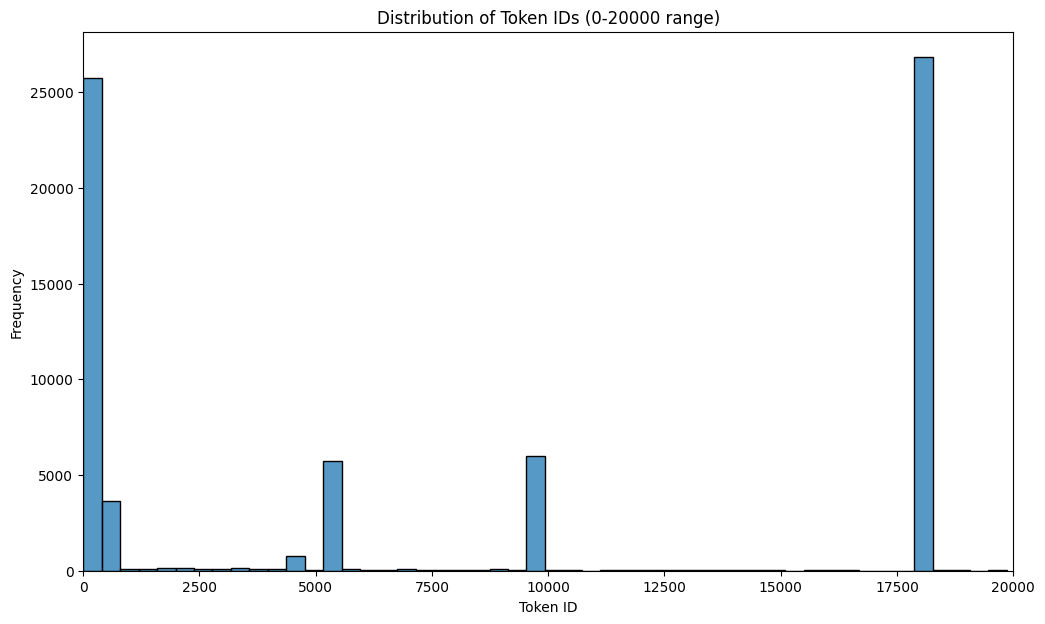

In [ ]:
# prompt: please create a histogram that maps the token ids of DOC of tokens for testing using tiktoken between 0 and 25000 and kepping the bins porportanial to the size of the histogram(the bins shouold be big)

# Check if file_contents variable exists and is not empty
if 'file_contents' in locals() and file_contents:
    # Initialize the encoder (ensure tiktoken is imported and installed as in previous cells)
    encoding = tiktoken.get_encoding("o200k_base")

    # Encode the text to get token IDs
    token_ids = encoding.encode(file_contents)

    # Filter token IDs to be between 0 and 25000
    filtered_token_ids = [token_id for token_id in token_ids if 0 <= token_id <= 20000]

    print(f"\nNumber of original tokens: {len(token_ids)}")
    print(f"Number of tokens between 0 and 20000: {len(filtered_token_ids)}")


    # Create a histogram of the filtered token IDs
    plt.figure(figsize=(12, 7)) # Increase figure size for better visibility

    if filtered_token_ids:
        # Calculate bins - aim for a reasonable number of bins, proportional to the range.
        # A fixed number like 100 or 200 is often better than one bin per value,
        # especially for large ranges, to keep the histogram readable and avoid memory issues.
        # Since we want "big" bins, let's choose a relatively small number of bins.
        num_bins = 50 # Example: Using 100 bins

        # Alternatively, calculate bin size based on range and desired bin count
        # range_of_ids = max(filtered_token_ids) - min(filtered_token_ids)
        # bin_width = range_of_ids / num_bins
        # print(f"Using approximately {num_bins} bins. Each bin width will be around {bin_width:.2f}.")


        sns.histplot(filtered_token_ids, bins=num_bins, kde=False) # Use the calculated number of bins
        plt.title('Distribution of Token IDs (0-20000 range)')
        plt.xlabel('Token ID')
        plt.ylabel('Frequency')
        # Optional: Set x-axis limits explicitly to the range of interest
        plt.xlim(0, 20000)
        plt.show()
    else:
        print("No token IDs between 0 and 20000 to plot histogram.")
else:
    print("\nCould not retrieve file content or file content is empty. Cannot perform token analysis.")